# Logistic regression

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

In [3]:
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

### Hypothesis

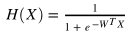

In [7]:
from IPython.display import Image
image_url = 'https://bitbucket.org/hyuk125/lg_dic/raw/99785e9d01523e8bb6bf78d1220c1b020fa6c7c8/image_day1/Hypo.png'
#image_url = 'https://github.com/jinkookkim9999/class_deeplr_day1/blob/main/Hypo.png'
Image(image_url)

### cost

In [8]:
from IPython.display import Image
image_url = 'https://bitbucket.org/hyuk125/lg_dic/raw/99785e9d01523e8bb6bf78d1220c1b020fa6c7c8/image_day1/cost.png'
Image(image_url)

Pytorch has binary cross entropy function:  
torch.nn.functional.binary_cross_entropy(input, target, ...)


In [9]:
predict = torch.FloatTensor(np.array([[0.1], [0.2], [0.9]]))
label = torch.FloatTensor(np.array([[0], [0], [1]]))

In [10]:
 F.binary_cross_entropy(predict, label)

tensor(0.1446)

## Training

In [11]:
class my_logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid() # Just add sigmoid function!

    def forward(self, x):
        return self.sigmoid(self.linear(x))

In [12]:
model = my_logistic()

In [13]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 100
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5])
        correct_prediction = prediction.float() == y_train
        accuracy = correct_prediction.sum().item() / len(correct_prediction)
        print('Epoch {:4d}/{} Cost: {:.6f} '.format(
            epoch, nb_epochs, cost.item(), 
        ))

Epoch    0/100 Cost: 1.512767 
Epoch   10/100 Cost: 0.546118 
Epoch   20/100 Cost: 0.503033 
Epoch   30/100 Cost: 0.424496 
Epoch   40/100 Cost: 0.360320 
Epoch   50/100 Cost: 0.305243 
Epoch   60/100 Cost: 0.256025 
Epoch   70/100 Cost: 0.211545 
Epoch   80/100 Cost: 0.175524 
Epoch   90/100 Cost: 0.153868 
Epoch  100/100 Cost: 0.141865 


### 결과 출력

In [14]:
from sklearn.decomposition import PCA

In [15]:
x1 = torch.linspace(0, 10, 100).reshape(-1, 1)
x2 = torch.linspace(0, 10, 100).reshape(-1, 1)

In [16]:
pca = PCA(n_components=1)
x_pca_100 = pca.fit_transform(torch.cat((x1, x2),axis=1))

In [17]:
x_pca = pca.transform(x_train)

In [18]:
hypothesis = model(torch.cat((x1, x2),axis=1))

In [19]:
hx = hypothesis.detach().numpy()

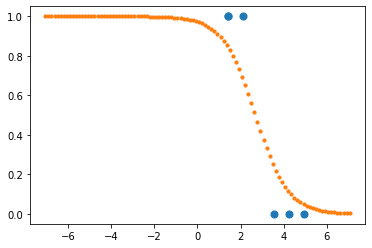

In [20]:
plt.scatter(x_pca, y_train, s=50)
plt.scatter(x_pca_100, hx, s=10)

### Accuracy

In [21]:
hypothesis = model(x_train)

prediction = hypothesis >= torch.FloatTensor([0.5])

correct_prediction = prediction.float() == y_train

accuracy = correct_prediction.sum().item() / correct_prediction.shape[0]

accuracy * 100

100.0